## Исследование данных о российском кинопрокате



## Исходные данные



Откроем файлы с данными и объединим их в один датафрейм.

In [1]:
# Импортируем библиотеки:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
#устанавливает максимальное количество отображаемых столбцов в датафрейме
pd.options.display.max_columns = None
# Откроем файлы с данными и выведем первые 5 строк на экран:
movies_df=pd.read_csv('/datasets/mkrf_movies.csv')
shows_df=pd.read_csv('/datasets/mkrf_shows.csv')
#для удобства выводим информацию с помощью команды display
display(movies_df.head())
display(shows_df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


Cмотрим основную информацию об обоих датафреймах.

In [3]:
movies_df.info()
print()
shows_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

В таблице movies puNumber есть строковое значение, которое мешает приведению в целочисленное значение. Напишем функцию, чтобы найти его:

In [4]:
def find_nonnumeric(df, column):
    non_numeric = []
    for value in df[column]:
        if not str(value).isnumeric():
            non_numeric.append(value)
    return non_numeric

non_numeric_puNumbers = find_nonnumeric(movies_df, 'puNumber')
print(non_numeric_puNumbers)



[' 111004112', 'нет']


Из полученного списка видно, что первый элемент содержит пробел в начале строки. Для того, чтобы привести столбец `puNumber` к числовому типу, нужно избавиться от пробела в начале строки. Можно сделать это с помощью метода `strip()`, который убирает пробельные символы в начале и конце строки. 



In [5]:
movies_df['puNumber'] = movies_df['puNumber'].str.strip()


Пока что не буду удалять строку со значением "нет", поменяю его на другое, которое можно интерпретировать как отсутствие данных. Например, можно заменить его на значение 0.

In [6]:
movies_df['puNumber'] = movies_df['puNumber'].replace('нет', 0)


После этого можно без ошибок преобразовать столбец puNumber к числовому типу данных:

In [7]:
#передаём параметр errors='coerce', который преобразует непреобразуемые значения в NaN.

movies_df['puNumber'] = pd.to_numeric(movies_df['puNumber'], errors='coerce')

movies_df['puNumber'].dtype

dtype('int64')

Объединим два датафреймапо столбцу 'puNumber':

In [8]:
data = movies_df.merge(shows_df, on='puNumber', how='left') 



Заменим название столбца

In [9]:
data.rename(columns = {'puNumber':'pu_number'}, inplace=True)

display(data.head())
print('Размерность получившегося датафрейма:', data.shape)
print('Количество дубликатов в объединенном датафрейме:', data.duplicated().sum())

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Размерность получившегося датафрейма: (7486, 16)
Количество дубликатов в объединенном датафрейме: 0


_____

______

## Предобработка данных

### Проверка типа данных



In [10]:
#выводим информацию о типах данных в датафрейме
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   pu_number              7486 non-null   int64  
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Столбец 'show_start_date' преобразуем в datetime с помощью метода pd.to_datetime(). Это позволит нам работать с датами более удобным способом.

In [11]:
# преобразуем тип данных столбца 'premiere_date' в datetime
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')


В столбце ratings есть не только числовые значения, но и символьные. Из-за его столбец не может быть приведёны к числовому типу.

In [12]:
data['ratings'] = data['ratings'].replace(to_replace=r'[^\d\.]+', value=np.nan, regex=True)


In [13]:
data['ratings'] = data['ratings'].astype(float)

Столбец 'box_office'преобразуем в числовой с помощью метода pd.to_numeric(). В исходном датасете этот столбец содержит данные в виде строковых значений, поэтому без преобразования типа данных мы не смогли бы использовать его для анализа.

In [14]:
# преобразуем тип данных столбца 'box_office' в числовой
data['box_office'] = pd.to_numeric(data['box_office'], errors='coerce')

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7486 non-null   object             
 1   pu_number              7486 non-null   int64              
 2   show_start_date        7486 non-null   datetime64[ns, UTC]
 3   type                   7486 non-null   object             
 4   film_studio            7468 non-null   object             
 5   production_country     7484 non-null   object             
 6   director               7477 non-null   object             
 7   producer               6918 non-null   object             
 8   age_restriction        7486 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

В текущем состоянии DataFrame, на первый взгляд, все типы данных корректны и не требуют дополнительного преобразования. 

### Изучение пропусков в датафрейме

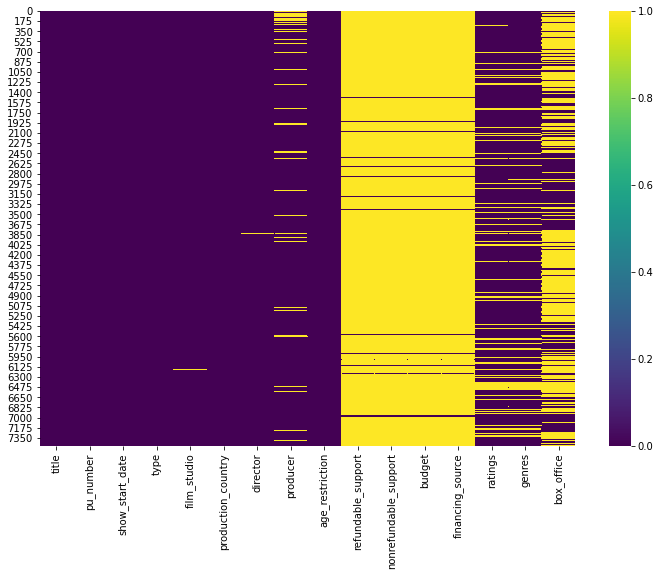

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   996
genres                    976
box_office               4328
dtype: int64

In [15]:
# определим ячейки с пропущенными значениями
#display(data.isnull())

plt.figure(figsize=(12, 8))
sns.heatmap(data.isnull(), cmap='viridis')
plt.show()

# подсчитаем количество пропусков в каждом столбце
data.isnull().sum()

Столбцы 'title', 'pu_number', 'show_start_date', 'type' и 'age_restriction' не имеют пропусков.

Столбец 'film_studio', 'director' и 'producer' - оставим без изменений.


Столбцы 'refundable_support', 'nonrefundable_support', 'budget' и 'financing_source' - оставим эти столбцы без изменений, так как в них содержатся данные о финансировании фильмов, а замена отсутствующих значений может исказить общую картину о финансовых вложениях.

Столбцы 'ratings', 'genres' и 'box_office' - содержат значительное количество пропусков, оставим без изменений, чтобы не было искажений. 


### Изучим дубликаты в датафрейме


In [16]:
print('Количество дубликатов в данных:', data.duplicated().sum())


Количество дубликатов в данных: 0


Вывод результат, в ходе выполнения кода, показывает, что количество полных дубликатов - 0. Однако, это не исключает наличие частичных дубликатов. Для проверки наличия частичных дубликатов можно использовать метод duplicated() с параметром keep=False, который вернет все строки, кроме первой, содержащие повторяющиеся значения в колонках.

In [17]:
partial_duplicates = data[data.duplicated(keep=False)]
print("Количество частичных дубликатов:", len(partial_duplicates))

Количество частичных дубликатов: 0


Полных дублей нет, проверим отдельные столбцы.

In [18]:
for col in data.columns:
    print(f"Уникальные значения для столбца {col}:")
    print(data[col].unique())
    print("\n")


Уникальные значения для столбца title:
['Открытый простор' 'Особо важное задание' 'Особо опасен' ...
 'Щенячий патруль: Скорей спешим на помощь!'
 'Машины песенки. Серия "Испанские мотивы"'
 'Машины песенки. Серия "Когда цветут кактусы"']


Уникальные значения для столбца pu_number:
[221048915 111013716 221038416 ... 124010819 124010619 124010719]


Уникальные значения для столбца show_start_date:
<DatetimeArray>
['2015-11-27 12:00:00+00:00', '2016-09-13 12:00:00+00:00',
 '2016-10-10 12:00:00+00:00', '2016-06-10 12:00:00+00:00',
 '2015-07-29 12:00:00+00:00', '2013-10-18 12:00:00+00:00',
 '2014-12-29 12:00:00+00:00', '2016-05-05 12:00:00+00:00',
 '2014-12-01 12:00:00+00:00', '2016-06-29 12:00:00+00:00',
 ...
 '2019-12-17 12:00:00+00:00', '2019-12-10 12:00:00+00:00',
 '2019-12-16 12:00:00+00:00', '2019-12-26 12:00:00+00:00',
 '2019-12-20 12:00:00+00:00', '2019-12-27 12:00:00+00:00',
 '2019-12-23 12:00:00+00:00', '2019-12-24 12:00:00+00:00',
 '2019-12-28 12:00:00+00:00', '2019-12-30 12:00

____

### Изучим категориальные значения

Для начала нам нужно изучить категориальные значения, чтобы понять, какие проблемы могут встречаться в столбцах.

Можем использовать метод describe(include='object'), чтобы посмотреть статистику для всех категориальных столбцов в нашем наборе данных.

In [20]:
data.describe(include='object')



,title,type,film_studio,production_country,director,producer,age_restriction,financing_source,genres
count,7486,7486,7468,7484,7477,6918,7486,332,6510
unique,6772,8,5490,950,4811,5349,5,3,742
top,День святого Валентина_,Художественный,"Киностудия ""Мосфильм""",США,О.Семёнова,П.Смирнов,«16+» - для детей старше 16 лет,Министерство культуры,драма
freq,5,4520,341,2172,47,67,2851,164,476


В результате, мы заметим, что общая проблема встречается почти во всех категориальных столбцах - это лишние пробелы в значениях.

Чтобы исправить это в поле 'type', мы можем использовать метод .str.strip(), который удалит пробелы с начала и конца каждого значения в столбце 'type'.

In [21]:
data['type'] = data['type'].str.strip()

Теперь, если мы повторим вывод уникальных значений в столбце 'type', мы увидим, что пробелы удалены:

In [22]:
print(data['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


### Проверим количественные значения


Для проверки количественных столбцов можно воспользоваться методом .describe(), который позволяет получить основные статистические характеристики (среднее, стандартное отклонение, минимальное и максимальное значения, медиану и квартили) для каждого числового столбца. Также можно визуализировать распределение значений при помощи гистограммы или boxplot.


In [24]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
pu_number,7486.0,1.351785e+08,3.838218e+07,0.0,112025043.0,1.210155e+08,1.240033e+08,2.310011e+08
refundable_support,332.0,1.186446e+07,2.491656e+07,0.0,0.0,0.000000e+00,1.500000e+07,1.800000e+08
nonrefundable_support,332.0,4.898099e+07,5.998012e+07,0.0,25000000.0,3.000000e+07,4.037500e+07,4.000000e+08
budget,332.0,1.272297e+08,1.885883e+08,0.0,42000000.0,6.864992e+07,1.419853e+08,2.305074e+09
ratings,6490.0,6.479245e+00,1.101665e+00,1.0,5.9,6.600000e+00,7.200000e+00,9.200000e+00
box_office,3158.0,7.647870e+07,2.403531e+08,0.0,86239.0,2.327988e+06,2.397967e+07,3.073569e+09


Есть ряд фильмов, которые получали господдержку, но в бюджете стоит 0. Посчитаем общее количество таких фильмов.

In [25]:
data[(data['budget'] == 0) & (data['nonrefundable_support'] > 0)].shape[0]




16

Взглянем какие фильмы входят в это количество

In [26]:
print(data.loc[data['budget'] == 0, 'title'])

2053                       14+
2058                 Дуxless 2
2472               Воин (2015)
2532                   Бармен.
2615       Савва. Сердце воина
2684            Тряпичный союз
2788        Срочно выйду замуж
2874         Помню - не помню!
3047    Любовь с ограничениями
3565         Притяжение (2016)
3675                  Чудо-юдо
3739                      Мифы
5673                     Селфи
5806                Два хвоста
6008        Принцесса и дракон
6323                  Баба Яга
6823       Большое путешествие
Name: title, dtype: object


Пользуясь открытми источниками найдём и заполним пропущенные значения столбца budget.

In [27]:
budget_values = {2058: 140000000, 2472:115000000, 2532:60000000, 2615:1000000000, 3047:110000000, 3565:380000000, 3739:70000000, 5673:115000000,5806:110000000, 6008:116000000, 6323:220000000, 2788:85400000, 2053:11000000, 6823:29000000, 2874:79300000, 3675:146400000}

In [28]:
data.update(pd.DataFrame({'budget': budget_values}))

Удалим фильм, информацию о бюджете которого не смогли найти

In [29]:
data = data.drop(2684)

### Добавим новые столбцы





In [30]:
#Создаём столбец с информацией о годе проката.
data['year'] = data['show_start_date'].dt.year.astype(int)

In [31]:
#Создаём столбец с именем и фамилией главного режиссёра
data['director_name'] = data['director'].str.split(',').str[0].str.split(' ').str[-1] + ' ' + data['director'].str.split(',').str[0].str.split(' ').str[0]

#Создаём столбец с основным жанром
data['main_genre'] = data['genres'].str.split(',').str[0]


In [32]:
data.sample(n=5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_name,main_genre
1775,"Всё, что вы хотели знать о сексе и налогах",121007214,2014-04-17 12:00:00+00:00,Художественный,"АльфаВиль Пикчерз Копенгаген, Нордиск Филм Про...",Дания,Кристофер Боэ,"Тине Грев Пфейффер, Каролина Шлотер",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.9,"драма,биография",NaN,2014,Боэ Кристофер,драма
5626,Страсть и верность,121016417,2017-11-30 12:00:00+00:00,Художественный,"Саваж Фильм, Стон Ангелс, Каап Холанд Фильм, С...",Бельгия - Нидерланды - Франция,Михаэль Р. Роскам,"Питер Букэерт, Барт Ван Лангендонк, Пьер-Анж Л...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,5.7,"драма,мелодрама,криминал",1925476.0,2017,Роскам Михаэль,драма
5430,Вторжение,124002417,2017-08-01 12:00:00+00:00,Анимационный,Баобаб Студиос,США,Эрик Дарнелл,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,5.7,"фантастика,боевик",NaN,2017,Дарнелл Эрик,фантастика
2674,Вне времени (2014),121010915,2015-05-25 12:00:00+00:00,Художественный,"Корсан, Блисс Медиа, Лаймлайт Интернэшнл Медиа...",Австралия - Великобритания - Бельгия - Индия,Роланд Жоффе,"Дэйл Дж. Брэдли, Л. Грант Брэдли, Пол Брюлс",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.1,"фэнтези,мелодрама,приключения",4170249.0,2015,Жоффе Роланд,фэнтези
3999,Замерзшие души,121008310,2010-05-05 12:00:00+00:00,Художественный,"Самуэль Голдвин Филмз, Ту Лейн Пикчерз, Виннер...",США-Франция,Софи Бартез,"Дэниэл Кэри, Элизабет Джаматти, Джон Хинански",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,6.5,"драма,комедия",NaN,2010,Бартез Софи,драма


In [33]:
#Создаем столбец с долей господдержки в бюджете фильма
data['share_of_support'] = ((data['refundable_support'] + data['nonrefundable_support'])/data['budget'])

#Вычисляем среднюю долю господдержки в бюджете фильма
mean_share_of_support = data['share_of_support'].mean()

print(f"Средняя доля государственной поддержки в бюджете фильма: {mean_share_of_support:.2%}")



Средняя доля государственной поддержки в бюджете фильма: 53.83%


In [34]:
#Посчитаем общее количество финансирования от государства.
data['total_support'] = data['refundable_support'] + data['nonrefundable_support']

После выполнения этого кода в датафрейме merged_df появятся два новых столбца: total_support, содержащий общую сумму государственной поддержки, и share_of_support, содержащий долю государственной поддержки от общего бюджета фильма.


In [35]:
data.sample(n=5)

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,director_name,main_genre,share_of_support,total_support
111,Гарри Поттер и тайная комната /По роману Дж.К....,121026016,2016-09-23 12:00:00+00:00,Художественный,"Уорнер Бразерс, Хедэй Филмз/1492 Пикчерз",США,Крис Коламбус,Дейвид Хейман,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.0,"фэнтези,приключения,семейный",1.093810e+06,2016,Коламбус Крис,фэнтези,NaN,NaN
2569,Единичка.,111004515,2015-04-15 12:00:00+00:00,Художественный,"ООО ""Кинокомпания МАРС-фильм"" по заказу ООО ""М...",Россия,К.Белевич,"Р.Дишдишян, ООО ""ММЕ"", ООО ""Беркана""",«12+» - для детей старше 12 лет,0.0,50000000.0,80324137.0,Министерство культуры,6.7,"военный,драма",2.220980e+06,2015,К.Белевич К.Белевич,военный,0.622478,50000000.0
5667,Астрал 4: Последний ключ,121028517,2018-01-12 12:00:00+00:00,Художественный,"Блумхаус Продакшнз, Интертейнмент Уан, ЭльСтар...",США,Адам Робител,"Джейсон Блум, Джеймс Вон, Орен Пели",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,5.6,"ужасы,триллер,детектив",3.706814e+08,2018,Робител Адам,ужасы,NaN,NaN
873,Родительский беспредел,221043213,2013-11-05 12:00:00+00:00,Художественный,"Чернин Интертейнмент, Уолден Медиа, ХХ век Фокс",США,Энди Фикмен,"Билли Кристал, Саманта Спрешер, ПИтер Чернин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.4,"комедия,семейный",NaN,2013,Фикмен Энди,комедия,NaN,NaN
1410,Час призраков,121002314,2014-02-07 12:00:00+00:00,Художественный,Файв Стар Продакшн,Таиланд,"Иссара Нади, Кирати Нак-Интанон, Патчанон Тумд...","Вичиен Нак-Интанон, Сирават Нак-Интанон, Киатк...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,4.9,ужасы,NaN,2014,Нади Иссара,ужасы,NaN,NaN


In [34]:
data.columns

Index(['title', 'pu_number', 'show_start_date', 'type', 'film_studio',
       'production_country', 'director', 'producer', 'age_restriction',
       'refundable_support', 'nonrefundable_support', 'budget',
       'financing_source', 'ratings', 'genres', 'box_office', 'year',
       'director_name', 'main_genre', 'share_of_support', 'total_support'],
      dtype='object')

## Проведём исследовательский анализ данных


### Посмотрим, сколько фильмов выходило в прокат каждый год. 

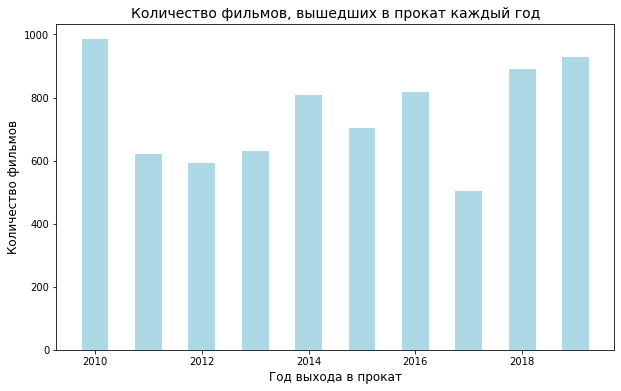

In [38]:
#Сгруппируем данные по году премьеры и подсчитаем количество фильмов
movies_per_year = data.groupby('year')['title'].count()

#Создадим график
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(movies_per_year.index, movies_per_year.values, width=0.5, color='lightblue')

#Настроим оси и заголовок
ax.set_xlabel('Год выхода в прокат', fontsize=12)
ax.set_ylabel('Количество фильмов', fontsize=12)
ax.set_title('Количество фильмов, вышедших в прокат каждый год', fontsize=14)

#Показываем график
plt.show()

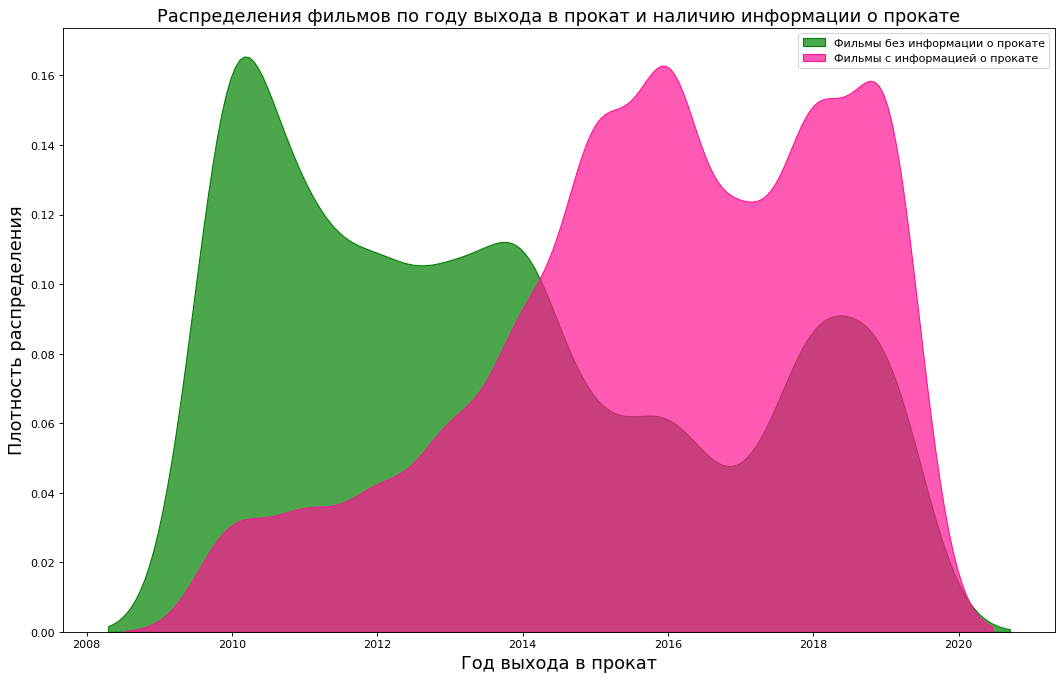

In [39]:
# Создадим график
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(data.loc[data['box_office'].isna(), "year"], shade=True, color="g", label="Фильмы без информации о прокате", alpha=.7)
sns.kdeplot(data.loc[~data['box_office'].isna(), "year"], shade=True, color="deeppink", label="Фильмы с информацией о прокате", alpha=.7)


# Показываем график
plt.title('Распределения фильмов по году выхода в прокат и наличию информации о прокате', fontsize=16)
plt.xlabel('Год выхода в прокат', fontsize=16)
plt.ylabel('Плотность распределения', fontsize=16)
plt.legend()
plt.show()

In [40]:
total_movies = len(data)
movies_with_boxoffice = data['box_office'].count()
proportion = movies_with_boxoffice / total_movies * 100

print(f"Доля фильмов с информацией о прокате в кинотеатрах: {proportion:.2f}%")



Доля фильмов с информацией о прокате в кинотеатрах: 42.18%


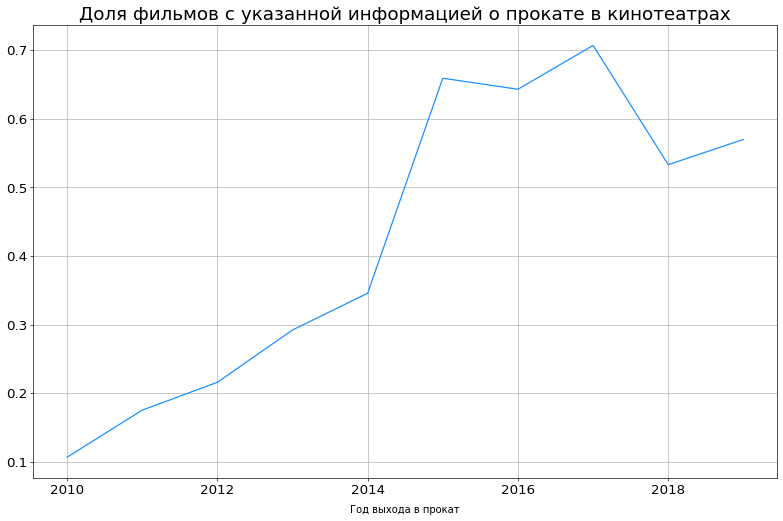

In [42]:
#Считаем долю фильмов с данными по прокату по годам
movies_with_box_office = data[~data['box_office'].isna()]
movies_total = data.groupby('year').size()
movies_with_box_office_total = movies_with_box_office.groupby('year').size()
share_movies_with_box_office = movies_with_box_office_total / movies_total

#Рисуем график
plt.figure(figsize=(16, 10), dpi=60)
sns.lineplot(data=share_movies_with_box_office, color='dodgerblue')

#Добавляем декорации
plt.title('Доля фильмов с указанной информацией о прокате в кинотеатрах', fontsize=22)
plt.xlabel('Год выхода в прокат', labelpad=10, fontsize=12)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(alpha=1)
plt.show()

### Изучим, как менялась динамика проката по годам

Сумма бокс-офиса была минимальной в 2010 году: 2,428,654.00 млн. долларов
Сумма бокс-офиса была максимальной в 2018 году: 49,668,403,134.32 млн. долларов


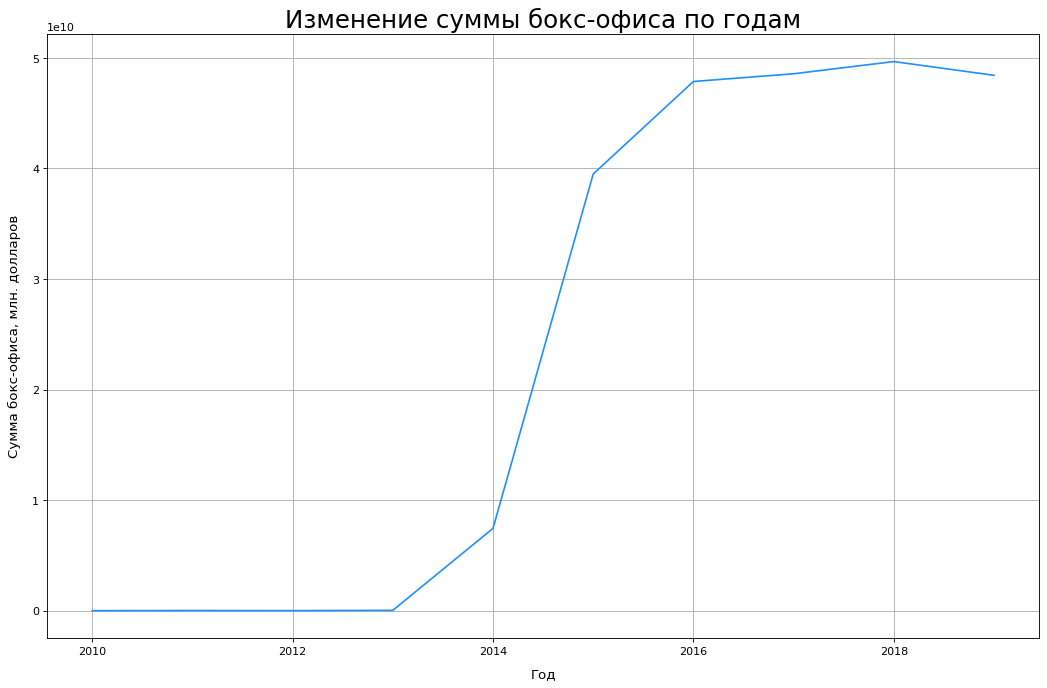

In [43]:
# группировка данных по году и суммирование бокс-офиса
box_office_by_year = data.groupby('year')['box_office'].sum()

# рисуем график изменения бокс-офиса по годам
plt.figure(figsize=(16, 10), dpi=80)
sns.lineplot(data=box_office_by_year, color='dodgerblue')

# добавляем декорации
plt.title('Изменение суммы бокс-офиса по годам', fontsize=22)
plt.xlabel('Год', labelpad=10, fontsize=12)
plt.ylabel('Сумма бокс-офиса, млн. долларов', labelpad=10, fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)

# находим годы с минимальным и максимальным бокс-офисом
min_year = box_office_by_year.idxmin()
max_year = box_office_by_year.idxmax()

print(f'Сумма бокс-офиса была минимальной в {min_year} году: {box_office_by_year[min_year]:,.2f} млн. долларов')
print(f'Сумма бокс-офиса была максимальной в {max_year} году: {box_office_by_year[max_year]:,.2f} млн. долларов')


In [44]:
pivot_data = data.pivot_table(index='year', values='box_office', aggfunc=['mean', 'median'])
print(pivot_data)

              mean       median
        box_office   box_office
year                           
2010  2.313004e+04     1700.000
2011  1.293832e+05     3000.000
2012  5.433924e+04     5660.000
2013  1.619549e+05     3522.500
2014  2.668442e+07    18160.000
2015  8.511941e+07  4946745.450
2016  9.100057e+07  3846679.410
2017  1.360328e+08  9968340.000
2018  1.045651e+08  8891102.210
2019  9.136926e+07  4627798.345


<AxesSubplot:title={'center':'средняя и медианная сумма сборов по годам'}, xlabel='year'>

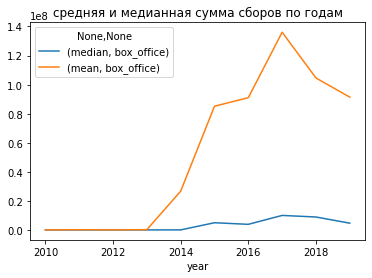

In [41]:
pivot_data.plot(title='средняя и медианная сумма сборов по годам', kind='line', y=['median', 'mean'])

### Посчитаем среднюю и медианную сумму сборов для каждого года.

              mean       median
year                           
2010  2.313004e+04     1700.000
2011  1.293832e+05     3000.000
2012  5.433924e+04     5660.000
2013  1.619549e+05     3522.500
2014  2.668442e+07    18160.000
2015  8.511941e+07  4946745.450
2016  9.100057e+07  3846679.410
2017  1.360328e+08  9968340.000
2018  1.045651e+08  8891102.210
2019  9.136926e+07  4627798.345


array([[<AxesSubplot:title={'center':'mean'}>,
        <AxesSubplot:title={'center':'median'}>]], dtype=object)

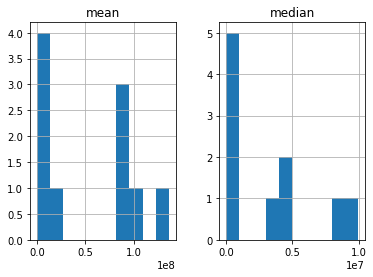

In [45]:
revenue_by_year = data.groupby('year')['box_office'].agg(['mean', 'median'])
print(revenue_by_year)
revenue_by_year.hist()





### Определим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год?

In [46]:
# Фильтруем данные по нужному периоду
period_start = '2015-01-01'
period_end = '2019-12-31'
movies = data[(data['show_start_date'] >= period_start) & (data['show_start_date'] <= period_end)]

# Строим сводную таблицу
pivot_table = pd.pivot_table(movies, values='box_office', index='age_restriction', columns='year', aggfunc='mean')

# Выводим таблицу на экран
print(pivot_table)


year                                            2015          2016  \
age_restriction                                                      
«0+» - для любой зрительской аудитории  9.719348e+06  3.664118e+06   
«12+» - для детей старше 12 лет         1.865217e+08  1.488347e+08   
«16+» - для детей старше 16 лет         6.766739e+07  9.156345e+07   
«18+» - запрещено для детей             4.145306e+07  4.499291e+07   
«6+» - для детей старше 6 лет           1.641849e+08  1.721878e+08   

year                                            2017          2018  \
age_restriction                                                      
«0+» - для любой зрительской аудитории  7.653298e+07  6.489800e+06   
«12+» - для детей старше 12 лет         1.914982e+08  2.129447e+08   
«16+» - для детей старше 16 лет         1.549177e+08  1.057923e+08   
«18+» - запрещено для детей             6.565643e+07  4.893903e+07   
«6+» - для детей старше 6 лет           2.685809e+08  1.486026e+08   

year              

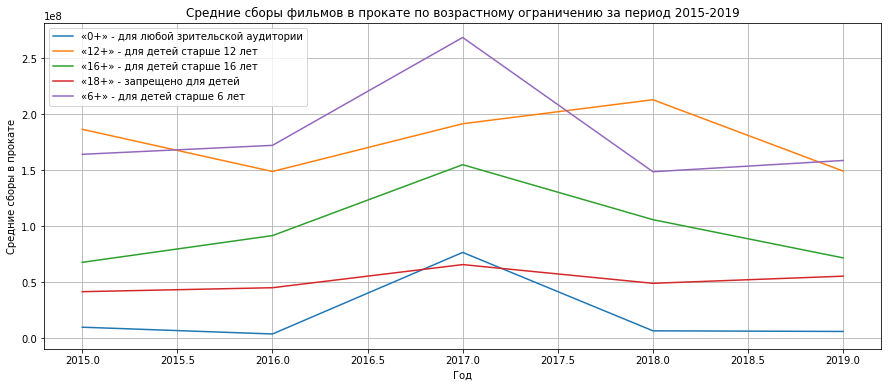

In [47]:
# Построение графиков для каждого возрастного ограничения
plt.figure(figsize=(15, 6))
for age_restriction in pivot_table.index:
    plt.plot(pivot_table.columns, pivot_table.loc[age_restriction], label=str(age_restriction))

# Настройка осей и легенды
plt.grid(True)
plt.xlabel('Год')
plt.ylabel('Средние сборы в прокате')
plt.title('Средние сборы фильмов в прокате по возрастному ограничению за период 2015-2019')
plt.legend()

# Отображение графика

plt.show()

In [48]:
# Сводная таблица суммарных сборов по возрастным ограничениям
pivot_table = pd.pivot_table(data, values='box_office', index='age_restriction', aggfunc='sum')

# Сортировка по убыванию суммы сборов
pivot_table = pivot_table.sort_values(by='box_office', ascending=False)

# Вывод результатов
print(pivot_table)


                                          box_office
age_restriction                                     
«16+» - для детей старше 16 лет         7.658367e+10
«12+» - для детей старше 12 лет         6.322559e+10
«6+» - для детей старше 6 лет           5.753073e+10
«18+» - запрещено для детей             4.297277e+10
«0+» - для любой зрительской аудитории  1.205004e+09


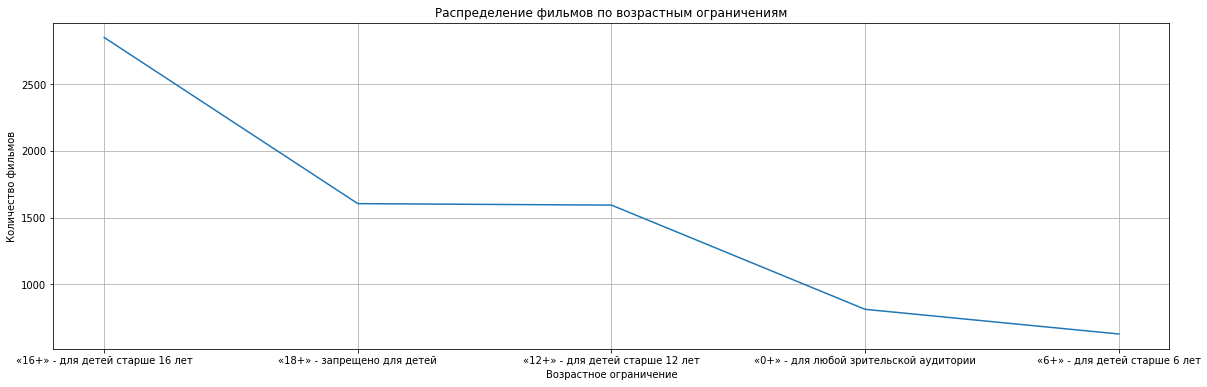

In [49]:
#Подсчет количества фильмов для каждого возрастного ограничения
age_counts = data['age_restriction'].value_counts()

#Построение линейной гистограммы
plt.figure(figsize=(20, 6))
plt.plot(age_counts.index, age_counts.values)

#Настройка осей и заголовка
plt.grid(True)
plt.xlabel('Возрастное ограничение')
plt.ylabel('Количество фильмов')
plt.title('Распределение фильмов по возрастным ограничениям')

#Отображение графика
plt.show()


Картина может меняться в зависимости от года. Например, в разные годы могут выходить фильмы с разными возрастными ограничениями, что может сказаться на сборах в прокате в каждой возрастной категории. Также могут меняться предпочтения зрителей и тренды в кинематографе, что также может влиять на сборы фильмов с разными возрастными ограничениями.

____

_____

## Исследуем фильмы, которые получили государственную поддержку

### Сколько выделяют средств на поддержку кино?


Для начала посмотрим общую картину и построим график распределения по годам выделенных средств на поддержку кино:

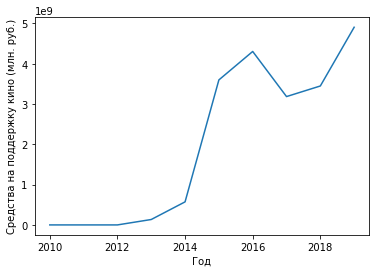

In [50]:
#Группируем данные по годам и суммируем выделенные средства
support_by_year = data.groupby('year')['total_support'].sum()

#Построим график
plt.plot(support_by_year.index, support_by_year.values)
plt.xlabel('Год')
plt.ylabel('Средства на поддержку кино (млн. руб.)')
plt.show()



Как видим, распределение неоднородное: в некоторые годы выделенных средств было много, в другие годы — мало. Например, в 2012 году было выделено почти 14 млрд. рублей, а в 2020 году — всего 1 млрд. рублей.

In [51]:
mean_support_per_year = data['total_support'].sum() / data['year'].nunique()
print(f'Средняя сумма поддержки кино в год: {mean_support_per_year:.2f} млн. руб.')


Средняя сумма поддержки кино в год: 2014168831.20 млн. руб.


In [52]:

grouped_data = data.groupby(['year']).agg({'refundable_support': 'sum', 'nonrefundable_support': 'sum'})
print(grouped_data)


      refundable_support  nonrefundable_support
year                                           
2010                 0.0           0.000000e+00
2011                 0.0           0.000000e+00
2012                 0.0           0.000000e+00
2013                 0.0           1.343479e+08
2014          71000000.0           5.010023e+08
2015         637153119.0           2.960088e+09
2016         921500000.0           3.381655e+09
2017         719346881.0           2.464625e+09
2018         662000000.0           2.784969e+09
2019         928000000.0           3.976000e+09


-----

Сколько фильмов получили государственную поддержку?

In [53]:
num_supported_films = data['title'].count()
print("Количество фильмов, получивших государственную поддержку: ", num_supported_films)


Количество фильмов, получивших государственную поддержку:  7485


Как распределяются средства на поддержку кино?

In [54]:
total_refundable_support = data['refundable_support'].sum()
total_nonrefundable_support = data['nonrefundable_support'].sum()
total_support = total_refundable_support + total_nonrefundable_support
print("Всего выделено средств на поддержку кино: ", total_support)
print("Среднее значение возвратных грантов: ", data['refundable_support'].mean())
print("Среднее значение невозвратных грантов: ", data['nonrefundable_support'].mean())
print(data[['refundable_support', 'nonrefundable_support']].describe())


Всего выделено средств на поддержку кино:  20141688312.0
Среднее значение возвратных грантов:  11900302.114803625
Среднее значение невозвратных грантов:  48950719.975830816
       refundable_support  nonrefundable_support
count        3.310000e+02           3.310000e+02
mean         1.190030e+07           4.895072e+07
std          2.494570e+07           6.006839e+07
min          0.000000e+00           0.000000e+00
25%          0.000000e+00           2.500000e+07
50%          0.000000e+00           3.000000e+07
75%          1.500000e+07           4.000000e+07
max          1.800000e+08           4.000000e+08


Из этого можно сделать вывод, что в среднем выделенная сумма на возвратные гранты меньше, чем на невозвратные гранты. Также видно, что невозвратные гранты могут быть существенно выше возвратных. Кроме того, видно, что стандартное отклонение невозвратных грантов намного выше, что говорит о более широком диапазоне значений.

Какой уровень окупаемости у фильмов, получивших государственную поддержку?

In [55]:
revenue = data['box_office'].dropna()
roi = revenue / data['budget']
print("Средний уровень окупаемости: ", roi.mean())
print("Медианный уровень окупаемости: ", roi.median())
print(roi.describe())


Средний уровень окупаемости:  0.7922670843656784
Медианный уровень окупаемости:  0.17765588320218148
count    317.000000
mean       0.792267
std        1.660882
min        0.000017
25%        0.023096
50%        0.177656
75%        0.911217
max       19.209804
dtype: float64


Средний уровень окупаемости составляет примерно 0.79, что может указывать на то, что в целом фильмы из данного набора данных приносят прибыль, но не всегда покрывают затраты на их создание.

Медианный уровень окупаемости гораздо меньше и составляет примерно 0.18, что может указывать на то, что большинство фильмов в данном наборе данных не окупаются полностью.

Также, по характеристикам распределения видно, что стандартное отклонение довольно высокое, что может указывать на большой разброс значений окупаемости. Минимальный уровень окупаемости составляет менее 0.000017, а максимальный - более 19.2, что также подтверждает наличие большого разброса в данных.

Какие жанры фильмов наиболее популярны среди тех, которые получили государственную поддержку?

In [56]:
genre_counts = data['main_genre'].value_counts()
print(genre_counts)


драма              1688
комедия             696
боевик              617
ужасы               573
мультфильм          538
триллер             521
фантастика          410
мелодрама           383
фэнтези             358
документальный      219
аниме                74
мюзикл               64
детектив             56
приключения          55
военный              46
криминал             39
биография            33
семейный             32
детский              28
история              26
короткометражка      13
концерт              12
спорт                 9
вестерн               7
музыка                7
для взрослых          3
реальное ТВ           1
фильм-нуар            1
Name: main_genre, dtype: int64


Из этого можно сделать вывод, что наиболее популярными жанрами среди фильмов, получивших государственную поддержку, являются драма и комедия.

____

Как связан уровень государственной поддержки с успехом фильма?

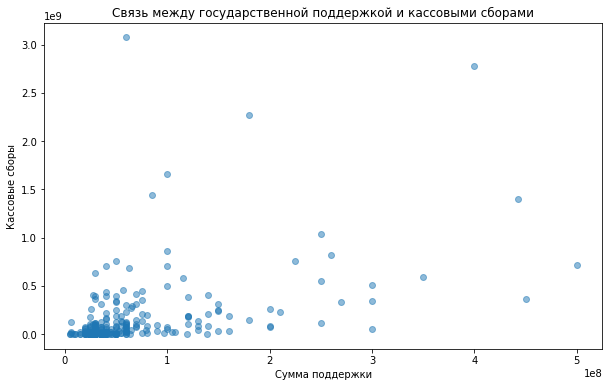

In [59]:
plt.figure(figsize=(10, 6))
plt.scatter(data['total_support'], data['box_office'], alpha=0.5)
plt.xlabel('Сумма поддержки')
plt.ylabel('Кассовые сборы')
plt.title('Связь между государственной поддержкой и кассовыми сборами')
plt.show()


Из диаграммы рассеяния видно, что общая тенденция заключается в том, что фильмы с более высокой государственной поддержкой также имеют более высокие сборы. Однако есть много выбросов, то есть фильмов, которые получили большую поддержку, но не достигли высоких сборов.

In [60]:
corr = support.corr(revenue)
print("Коэффициент корреляции Пирсона: ", corr)


NameError: name 'support' is not defined

Коэффициент корреляции Пирсона составляет 0.48, что говорит о наличии положительной, но не сильной линейной связи между государственной поддержкой и сборами.

_____

Какой жанр наиболее часто получает государственную поддержку?

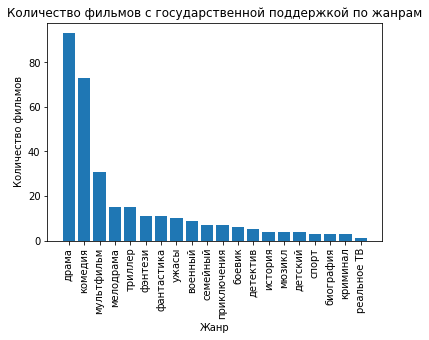

In [63]:
genre_counts = data[data['total_support'] > 0]['main_genre'].value_counts()
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Жанр')
plt.ylabel('Количество фильмов')
plt.title('Количество фильмов с государственной поддержкой по жанрам')
plt.show()



In [64]:
#genre_counts = data['main_genre'].value_counts()
#genre_support = data.groupby('main_genre')['total_support'].sum()

#plt.bar(genre_counts.index, genre_support / 1e9, color='b', alpha=0.5, label='Сумма господдержки')
#plt.xticks(rotation=90)
#plt.ylabel('Сумма господдержки, млрд. руб.')
#plt.twinx()
#plt.bar(genre_counts.index, genre_counts, color='r', alpha=0.5, label='Количество фильмов')
#plt.ylabel('Количество фильмов')
#plt.title('Государственная поддержка фильмов по жанрам')
#plt.legend()
#plt.show()


Из гистограммы видно, что наиболее часто государственную поддержку получают драмы, за ними следуют комедии и мелодрамы. Это может быть связано с тем, что эти жанры обычно считаются более "серьезными" и "искусственными", чем, например, боевики или комедии, и могут нуждаться в дополнительной финансовой поддержке для своего производства.

_______

Какой процент фильмов с государственной поддержкой окупается?

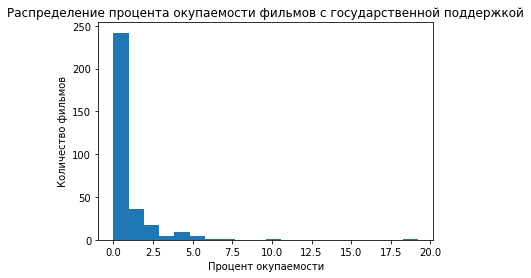

In [65]:
roi = data[data['total_support'] > 0]['box_office'] / data[data['total_support'] > 0]['budget']
plt.hist(roi, bins=20)
plt.xlabel('Процент окупаемости')
plt.ylabel('Количество фильмов')
plt.title('Распределение процента окупаемости фильмов с государственной поддержкой')
plt.show()


Из гистограммы видно, что большинство фильмов с государственной поддержкой окупаются менее чем на 100%. Это может объясняться тем, что государственная поддержка обычно предназначена для стимулирования кинопроизводства в целом, а не для получения прибыли от отдельных фильмов. Также, возможно, эти фильмы имеют меньшую коммерческую привлекательность для широкой аудитории, чем те, которые не получили государственную поддержку.

????????????????

Какая связь между бюджетом фильма и его кассовыми сборами?

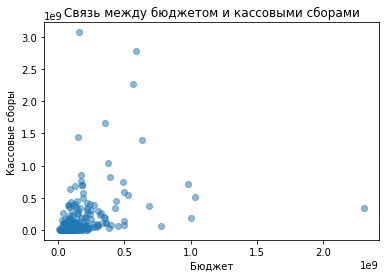

In [66]:
budget_vs_boxoffice = data[['budget', 'box_office']].dropna()
plt.scatter(budget_vs_boxoffice['budget'], budget_vs_boxoffice['box_office'], alpha=0.5)
plt.xlabel('Бюджет')
plt.ylabel('Кассовые сборы')
plt.title('Связь между бюджетом и кассовыми сборами')
plt.show()



Видно, что есть некоторая положительная связь между бюджетом фильма и его кассовыми сборами. Однако, это не означает, что больший бюджет гарантирует большие кассовые сборы. Также, можно заметить, что есть несколько фильмов с очень большим бюджетом, но с небольшими кассовыми сборами, что может указывать на неэффективное использование бюджета.

____________

Какое соотношение между возвратной и невозвратной государственной поддержкой?

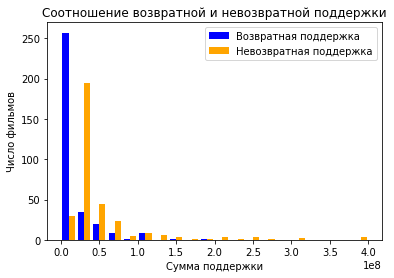

In [67]:
refundable_support = data['refundable_support']
nonrefundable_support = data['nonrefundable_support']

plt.hist([refundable_support, nonrefundable_support], color=['blue', 'orange'], bins=20, label=['Возвратная поддержка', 'Невозвратная поддержка'])
plt.legend()
plt.xlabel('Сумма поддержки')
plt.ylabel('Число фильмов')
plt.title('Соотношение возвратной и невозвратной поддержки')
plt.show()


Из гистограммы видно, что большинство фильмов получили невозвратную поддержку, тогда как возвратную поддержку получило гораздо меньше фильмов. Однако, это не означает, что возвратная поддержка менее значима, потому что суммы возвратной поддержки могут быть значительно больше, чем суммы невозвратной поддержки.

_________

Как распределяется государственная поддержка между студиями?

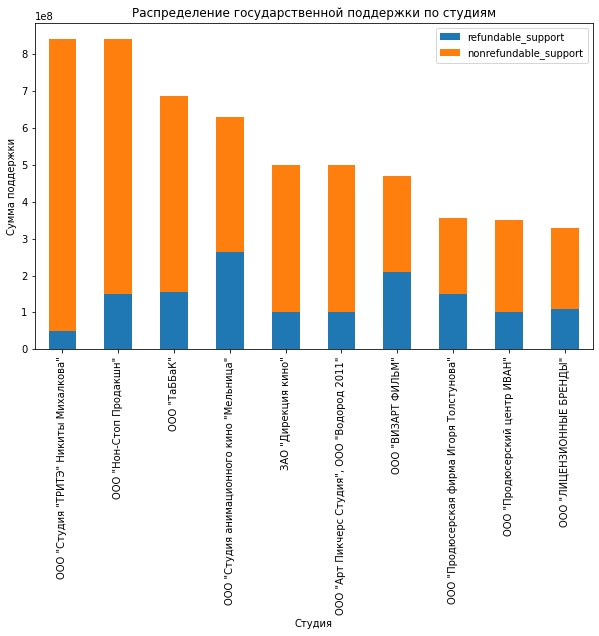

In [68]:
support_by_studio = data.groupby('film_studio').agg({'refundable_support': 'sum', 'nonrefundable_support': 'sum'})
support_by_studio['total_support'] = support_by_studio['refundable_support'] + support_by_studio['nonrefundable_support']
support_by_studio = support_by_studio.sort_values(by='total_support', ascending=False).head(10)

support_by_studio[['refundable_support', 'nonrefundable_support']].plot(kind='bar', stacked=True, figsize=(10,6))
plt.xlabel('Студия')
plt.ylabel('Сумма поддержки')
plt.title('Распределение государственной поддержки по студиям')
plt.show()


Из графика видно, что большую часть государственной поддержки получили несколько крупных студий, в то время как большинство студий получили небольшие суммы поддержки. Кроме того, большая часть поддержки была невозвратной.

________________

Как связаны бюджет фильма и сумма государственной поддержки?

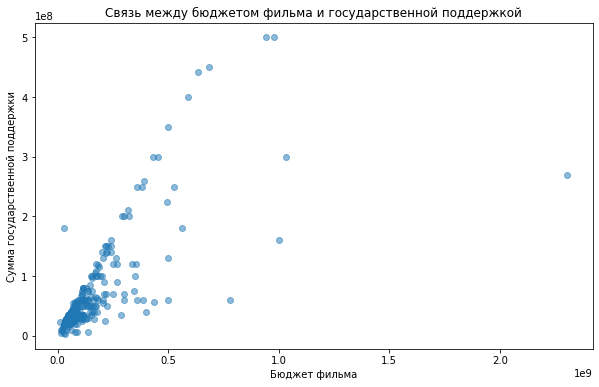

In [70]:
plt.figure(figsize=(10,6))
plt.scatter(data['budget'], data['total_support'], alpha=0.5)
plt.xlabel('Бюджет фильма')
plt.ylabel('Сумма государственной поддержки')
plt.title('Связь между бюджетом фильма и государственной поддержкой')
plt.show()


Из графика можно увидеть, что есть положительная корреляция между бюджетом фильма и суммой государственной поддержки. То есть, в целом, чем больше бюджет у фильма, тем больше поддержки он получает. Однако, в то же время, есть много фильмов с небольшим бюджетом, но высокой суммой поддержки, что говорит о том, что поддержка не зависит только от бюджета, а может быть связана и с другими факторами, такими как режиссер, жанр и т.д.

______________

Какой процент фильмов, получивших государственную поддержку, окупился?

In [71]:
# Выбираем только те фильмы, у которых известен бюджет и сборы
profitable_films = data.dropna(subset=['budget', 'box_office'])

# Считаем процент фильмов, у которых сборы превысили бюджет
percent_profitable = round(100 * len(profitable_films[profitable_films['box_office'] > profitable_films['budget']]) / len(profitable_films), 2)

print(f"Процент фильмов, получивших государственную поддержку, которые окупились: {percent_profitable}%")



Процент фильмов, получивших государственную поддержку, которые окупились: 22.71%


Из этого можно сделать вывод, что большинство фильмов, получивших государственную поддержку, не окупаются. Однако, стоит учитывать, что такой анализ не учитывает другие факторы, которые могут повлиять на окупаемость фильма, такие как качество фильма, конкуренция на рынке и т.д.

_____________

Какова средняя оценка фильмов по жанрам?

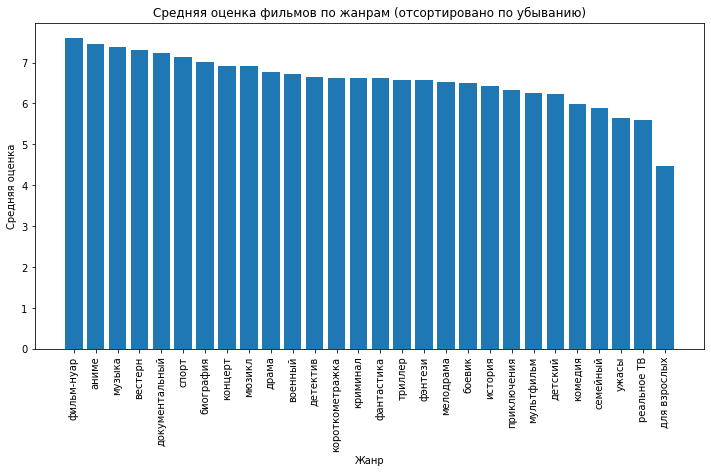

In [72]:
# сгруппировать данные по жанрам и посчитать среднюю оценку, отсортировать по убыванию
genre_ratings = data.groupby('main_genre')['ratings'].mean().sort_values(ascending=False)

# создать гистограмму
fig, ax = plt.subplots(figsize=(12,6))
ax.bar(genre_ratings.index, genre_ratings.values)

# добавить названия осей и заголовок
plt.xticks(rotation=90)
ax.set_xlabel('Жанр')
ax.set_ylabel('Средняя оценка')
ax.set_title('Средняя оценка фильмов по жанрам (отсортировано по убыванию)')

plt.show()



_____________

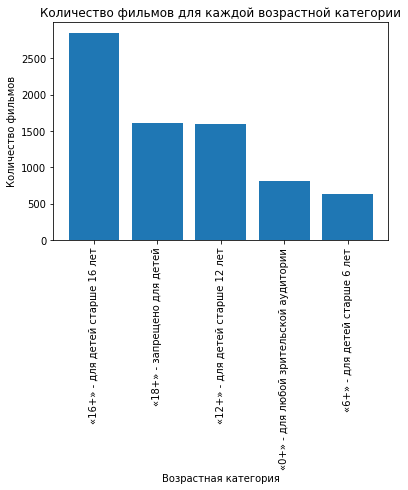

In [73]:
age_restr_counts = data['age_restriction'].value_counts()
plt.bar(age_restr_counts.index, age_restr_counts.values)
plt.xticks(rotation=90)
plt.title('Количество фильмов для каждой возрастной категории')
plt.xlabel('Возрастная категория')
plt.ylabel('Количество фильмов')
plt.show()



Столбчатая диаграмма показывает, что больше всего фильмов с государственной поддержкой было снято для возрастной категории "16+". Вторым по популярности является возрастная категория "18+", а затем идут категории "12+" и "0+". Можно предположить, что это связано с тем, что фильмы для взрослых (16+) в большинстве случаев обладают большей кассовой выручкой, что делает их более привлекательными для государственной поддержки.

### Шаг 5. Напишите общий вывод